### importing our libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

### Reading Data .. 

In [2]:
df= pd.read_csv("E:\\My Courses\\weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Let's explore our data

In [4]:
# this to show the data type , columns names ,sum of data that not a nans and memory usage . 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

### it's  time to dealing with  missing values ...

In [5]:
# show the number of missing values in each column.
df.isna().sum().sort_values(ascending=False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
Location             0
RainTomorrow         0
RISK_MM              0
Date                 0
dtype: int64

In [6]:
# Removing some columns that have > 28% nan values
max_nans=len(df)*0.28
df=df.loc[:, (df.isnull().sum(axis=0) <= max_nans)]

In [7]:
# show the number of the missing values 
df.isna().sum().sort_values(ascending=False)

Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
Location             0
RainTomorrow         0
RISK_MM              0
Date                 0
dtype: int64

In [8]:
#filling the missing values by the next value ('bfill') because the temperatures are nearly the same for the next day
df.fillna(method='bfill',inplace=True)

### let's working on the important features and drop some ...

In [9]:
df.drop(columns=['RISK_MM','Date','Location'],inplace=True)

In [10]:
# here we change the data type for these two column
df['RainTomorrow']=df['RainTomorrow'].astype('category')
df['RainToday']=df['RainToday'].astype('category')

In [11]:
# here we transform them to numeric values.
df['RainTomorrow']=df['RainTomorrow'].cat.codes
df['RainToday']=df['RainToday'].cat.codes

In [12]:
 # to know the number of row and columns .
df.shape

(142193, 17)

### let's make some visualisation...

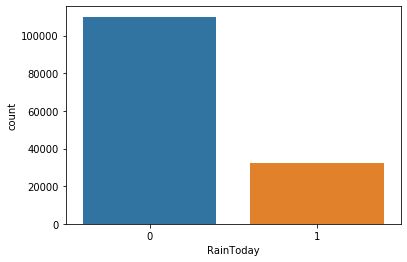

In [13]:
sns.countplot(df['RainToday'])

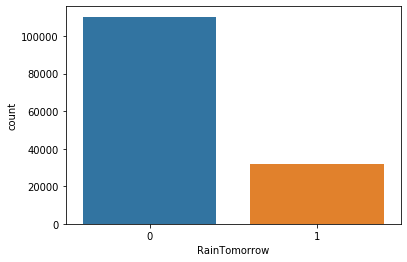

In [14]:
sns.countplot(df['RainTomorrow'])

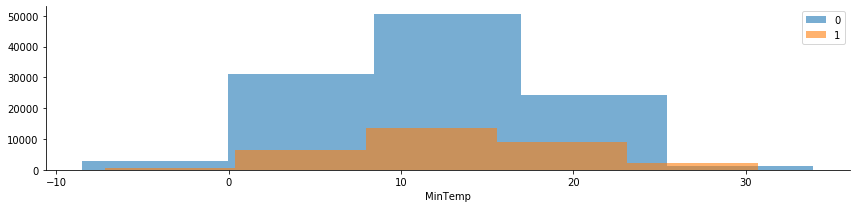

In [15]:
g = sns.FacetGrid(df,hue='RainTomorrow',aspect=4)
g.map(plt.hist,'MinTemp',alpha=0.6,bins=5)
plt.legend()

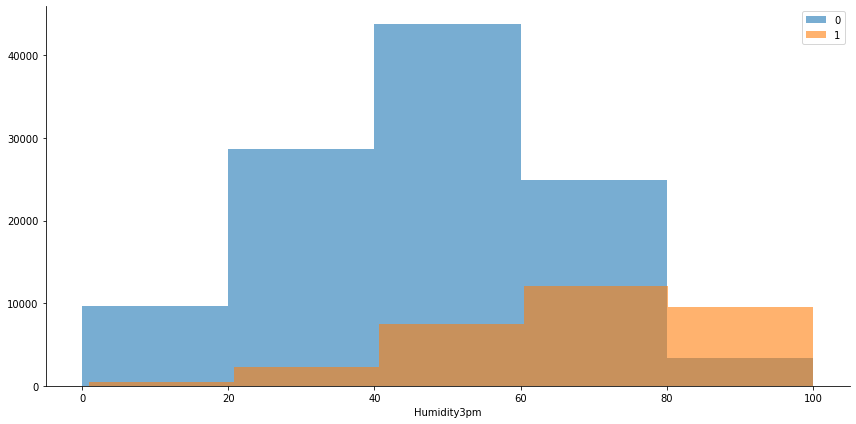

In [16]:
g = sns.FacetGrid(df,hue='RainTomorrow',height=6,aspect=2)
g.map(plt.hist,'Humidity3pm',alpha=0.6,bins=5)
plt.legend()

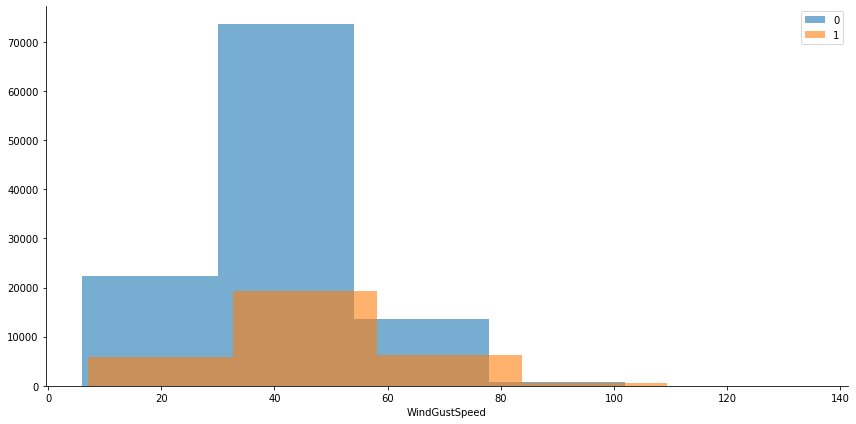

In [17]:
g = sns.FacetGrid(df,hue='RainTomorrow',height=6,aspect=2)
g.map(plt.hist,'WindGustSpeed',alpha=0.6,bins=5)
plt.legend()

### it's ML working time ...

In [18]:
#select the columns for the model.
X=df.iloc[:,:16]

In [19]:
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


In [20]:
# select our target .
y=df['RainTomorrow']

In [21]:
# here we transform the non_numeric features to make the model dealing with it . 
X=pd.get_dummies(X,columns=['WindDir9am','WindDir3pm','WindGustDir'],drop_first=True)

In [22]:
#Next, we split 75% of the data to the training set while 25% of the data to test set using below code.
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0,stratify=y)

In [23]:
#we need to bring all features to the same level of magnitudes. This can be achieved by a method called feature scaling.
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
X.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
4,0.613208,0.701323,0.002695,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.544811,0.652174,0.000539,0.387597,0.146154,0.275862,0.55,0.23,0.474380,0.4528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.537736,0.563327,0.000000,0.341085,0.153846,0.275862,0.49,0.19,0.480992,0.4976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.382075,0.595463,0.000000,0.224806,0.046154,0.195402,0.48,0.19,0.543802,0.5280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.429245,0.693762,0.000000,0.573643,0.053846,0.321839,0.42,0.09,0.469421,0.4240,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.509434,0.659735,0.003774,0.170543,0.115385,0.126437,0.58,0.27,0.438017,0.4576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### For k = 5 : 

In [24]:
#Our next step is to K-NN model and train it with the training data. Here n_neighbors is the value of factor K.
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
# Let's train our test data and check its accuracy.
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.830206194267068


In [26]:
# let's see the classification report .
y_test_pred = classifier.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     27580
           1       0.67      0.49      0.56      7969

    accuracy                           0.83     35549
   macro avg       0.76      0.71      0.73     35549
weighted avg       0.82      0.83      0.82     35549



In [27]:
#let's show the confusion matrix.
confusion_matrix(y_test,y_test_pred)

array([[25635,  1945],
       [ 4091,  3878]], dtype=int64)

### for K = 8 :

In [28]:
classifier = KNeighborsClassifier(n_neighbors = 8, p = 2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [29]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.8373793918253678


In [30]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_test_pred = classifier.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     27580
           1       0.74      0.42      0.54      7969

    accuracy                           0.84     35549
   macro avg       0.80      0.69      0.72     35549
weighted avg       0.83      0.84      0.82     35549




### So we tried more than 3 values on K and  as we can see that Accuracy is maximum that is 83.7 when k = 8  ss
